# Complexity Project

## 1 Implementation of the Oslo model.

In [5]:
import scipy as sp
import matplotlib.pyplot as plt
import random

The $oslo$ function which returns the final $z$ values and the final $h$ values which are worked out from the $z$ values and setting $h_{L+1} = 0$. The $oslo_plot$ function takes the output of the $oslo$ function and plots the heights.

In [6]:
def Oslo(L,p,n):
    #Initialisation
    z = sp.zeros(L)
    z_thresh = sp.zeros(L)
    n_grain = 0
    h_store = []
    h = sp.zeros(L)
    
    one = []
    
    def prob(p):
        if random.random() > p:
            return 1
            
        else:
            return 2
            
    def check_relax(z,z_thresh,L):
        relaxed = True
        for i in range(L):
            if z[i] > z_thresh[i]:
                relaxed = False
        return relaxed
    
    def h_generation(z):
        h = sp.zeros(L+1) #having the L+1 value as 0
        h[L] = 0
        for i in range(L-1,-1,-1):
            h[i] = z[i] + h[i+1]  
        return h
                
    for i in range(L):
        z_thresh[i] = prob(p)
    
    #Drive
    while n_grain < n:

        z[0] = z[0] + 1
        h[0] = h[0] + 1
        n_grain  = n_grain + 1
        
         
            
    #Relaxation
        while check_relax(z,z_thresh,L) == False:
        
            for i in range(L):

                if z[i] > z_thresh[i]: 

                    if i == 0:
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1
                        
                        h[i] = h[i] - 1
                        h[i+1] = h[i+1] + 1

                    if i > 0 and i < (L -1):
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1 
                        z[i-1] = z[i-1] + 1
                        
                        h[i] = h[i] - 1
                        h[i+1] = h[i+1] + 1

                    if i == L - 1:
                        z[i] = z[i] - 1
                        z[i-1] = z[i-1] + 1
                        h[i] = h[i] - 1
                        
                    u = prob(p)
                
                    z_thresh[i] = u
                    
                    one.append(z_thresh[i])
                    
        h_store.append(h_generation(z)[0])
                                
    p = h_generation(z)            
    return z , p , h_store , z_thresh , h

def Oslo_plot(oslo):
    L = len(oslo[1])
    L_plot = sp.linspace(0,L-1,L) + 0.5
    h = oslo[1]
    plt.bar(L_plot,h, width = 1)
    plt.xlabel("Lattice Number")
    plt.ylabel("Height $h$")
    plt.title("Oslo Method")
    plt.grid()
    plt.savefig("osls_initial", dpi = 1000)
    plt.show()

Below is the result of the oslo_plot function

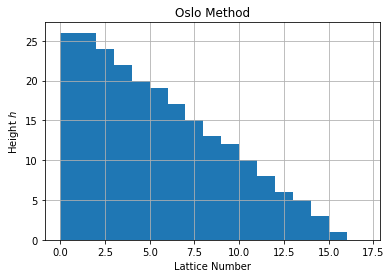

In [38]:
x = Oslo(16,0.5,1000)
Oslo_plot(x)

To test the function, the oslo_test function is used which returns the average height of the first entry after half the grains are added.


In [7]:
def Oslo_test(L,p,n):
    x = Oslo(L,p,n)
    Slice = int((7*n)/8)
    print(sp.mean(x[2][Slice:n:1]))

    
Oslo_test(16,0.5,3000)
Oslo_test(32,0.5,300)

26.512
28.55263157894737


In [229]:
16*1.5


24.0

In [ ]:
James :0 good luck on the work !!